#All import needed

In [ ]:
from google.colab import drive

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error

from sklearn.metrics import root_mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import r2_score

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import RobustScaler

#DataSet Loading

In [262]:
#drive.mount("/content/drive")
loan = pd.read_csv("Loan.csv")

# Preprocessing

Make a copy of the dataset

In [263]:
copy = loan.copy()

Describe Data

In [264]:
copy.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


Shape of data

In [265]:
copy.shape

(20000, 36)

Columns Types

In [266]:
copy.dtypes

,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


Handling Missing Data

In [267]:
copy.isna().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


Handle duplicates

In [268]:
copy.duplicated().sum()

0

Dropping Unnessary columns

In [269]:
copy.drop_duplicates()
copy.dropna()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


Handle Categorical Features

In [270]:
listOfColumns = []

listOfCategoricalColumns = []
for i in copy.select_dtypes(include = 'number'):
    listOfColumns.append(i)


for j in copy.columns:

    if j not in listOfColumns:
        listOfCategoricalColumns.append(j)
le = LabelEncoder()
for i in listOfCategoricalColumns:
    copy[i] = le.fit_transform(copy[i])


    print(f"{i} after {copy[i]}")

ApplicationDate after 0            0
1            1
2            2
3            3
4            4
         ...  
19995    19995
19996    19996
19997    19997
19998    19998
19999    19999
Name: ApplicationDate, Length: 20000, dtype: int64
EmploymentStatus after 0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: EmploymentStatus, Length: 20000, dtype: int64
EducationLevel after 0        4
1        0
2        1
3        3
4        0
        ..
19995    3
19996    0
19997    1
19998    3
19999    0
Name: EducationLevel, Length: 20000, dtype: int64
MaritalStatus after 0        1
1        2
2        1
3        2
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: MaritalStatus, Length: 20000, dtype: int64
HomeOwnershipStatus after 0        2
1        0
2        3
3        0
4        0
        ..
19995    3
19996    3
19997    0
19998    2
19999    2
Name: HomeOwnershipStatus, Length: 20

Defining Features and target

In [271]:
X = copy.drop(columns = ['ApplicationDate','RiskScore'])
Y = copy["RiskScore"]

Handling Outliers

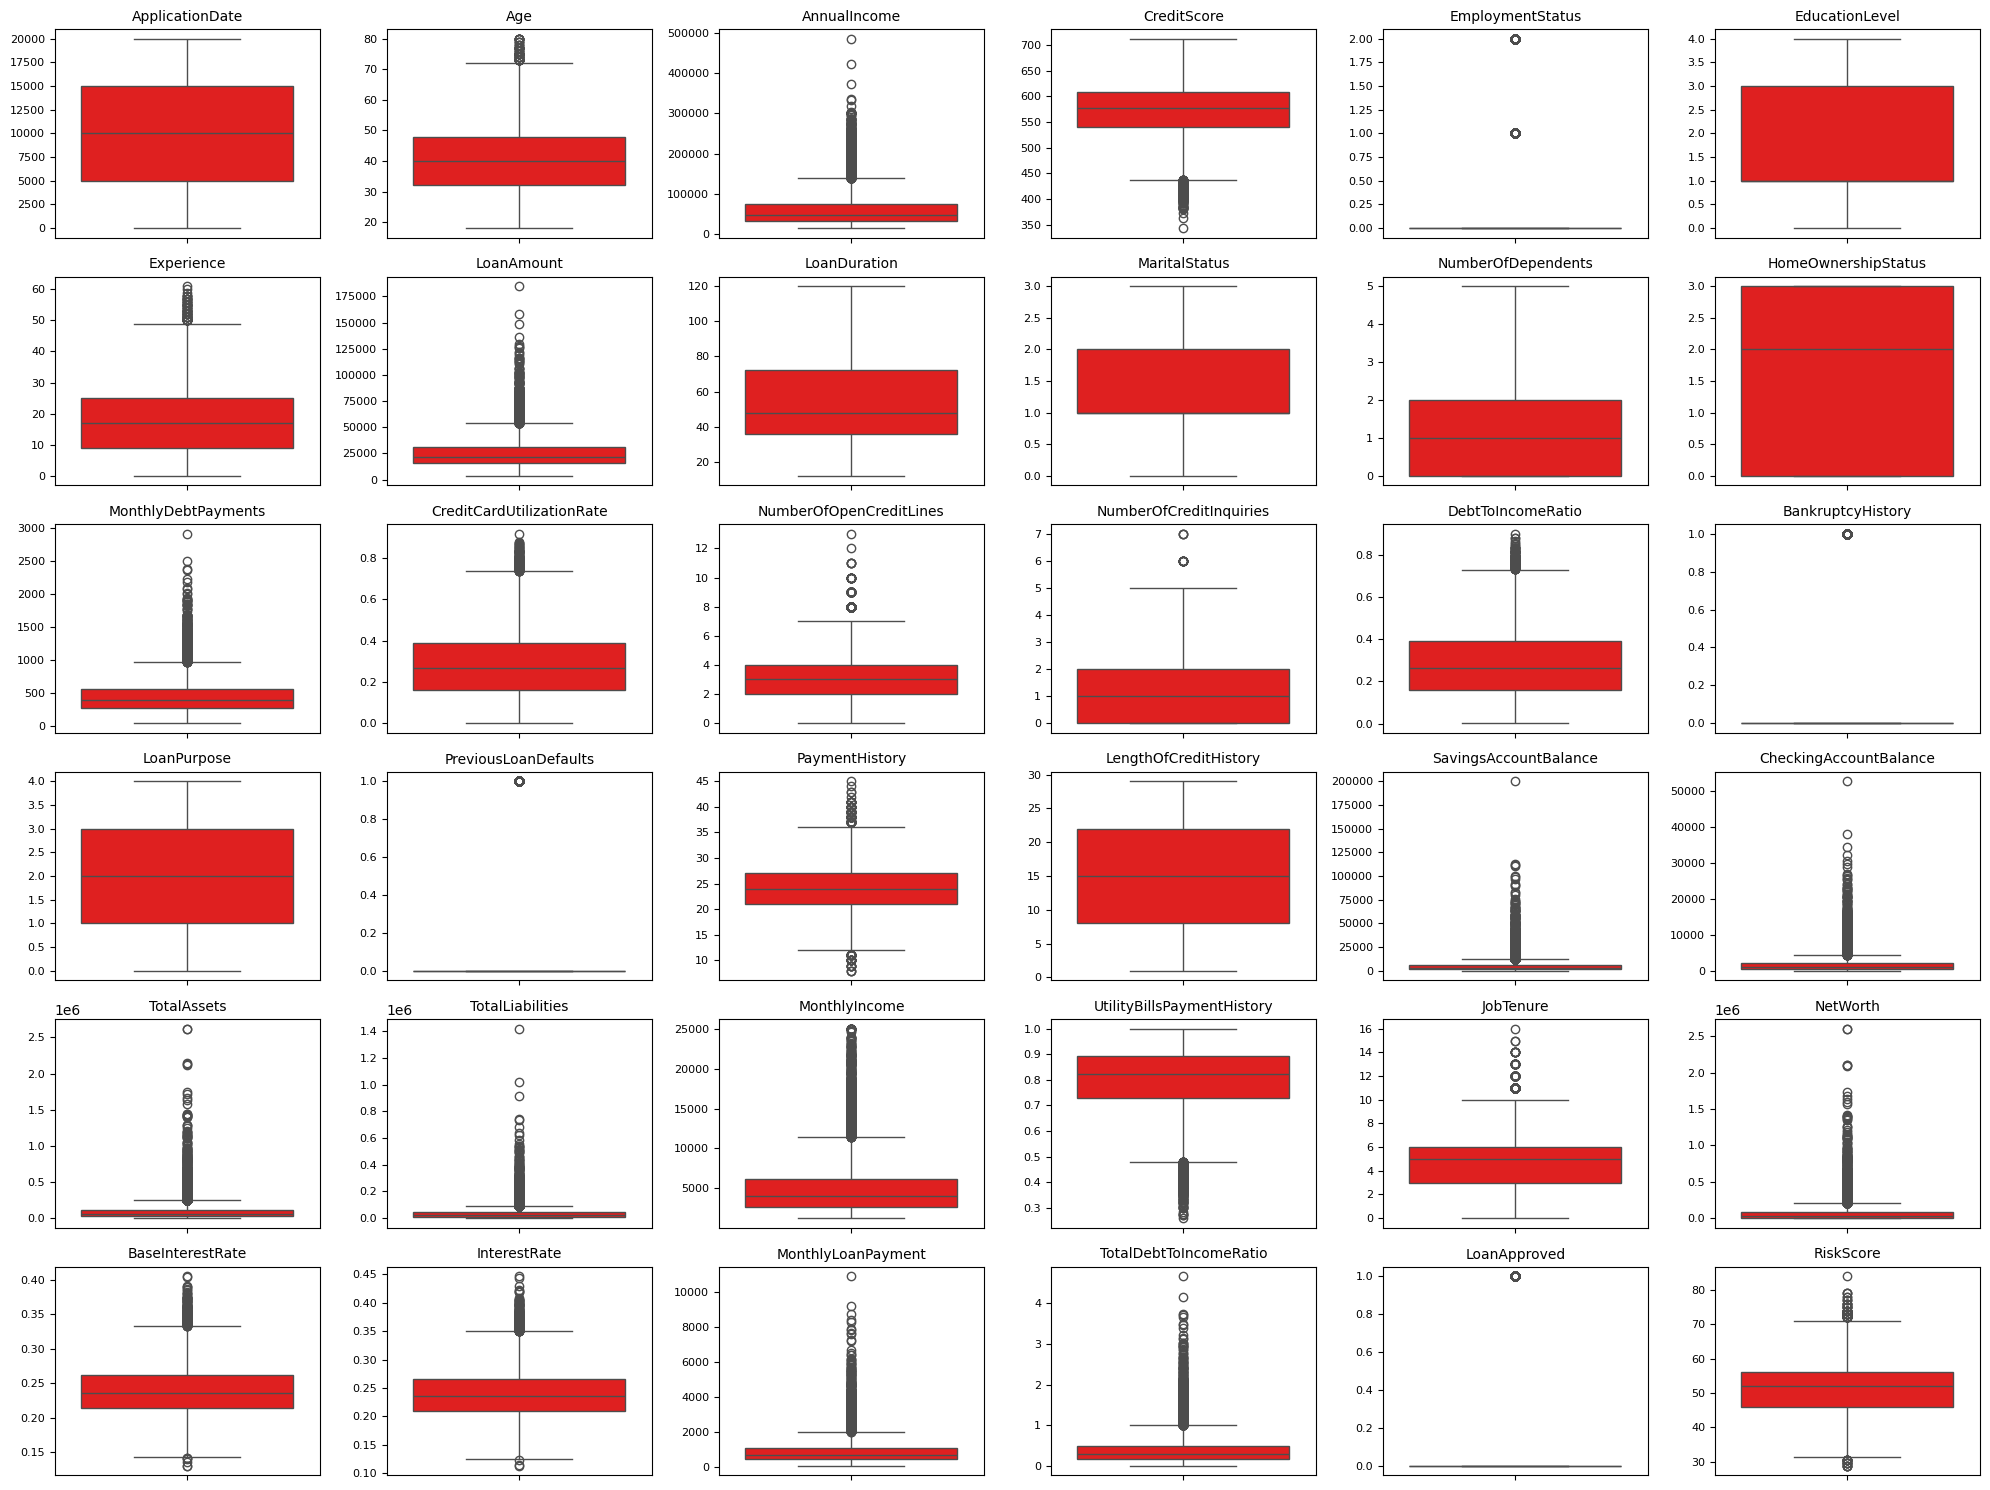

In [272]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(copy.columns[:]):
    sns.boxplot(data=copy, y=column, ax=axes[i], color='red')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()

Scaling

In [344]:
robust = RobustScaler()
scaledX = robust.fit_transform(X)
scaledY = robust.fit_transform(Y.values.reshape(-1,1))

# Visualization

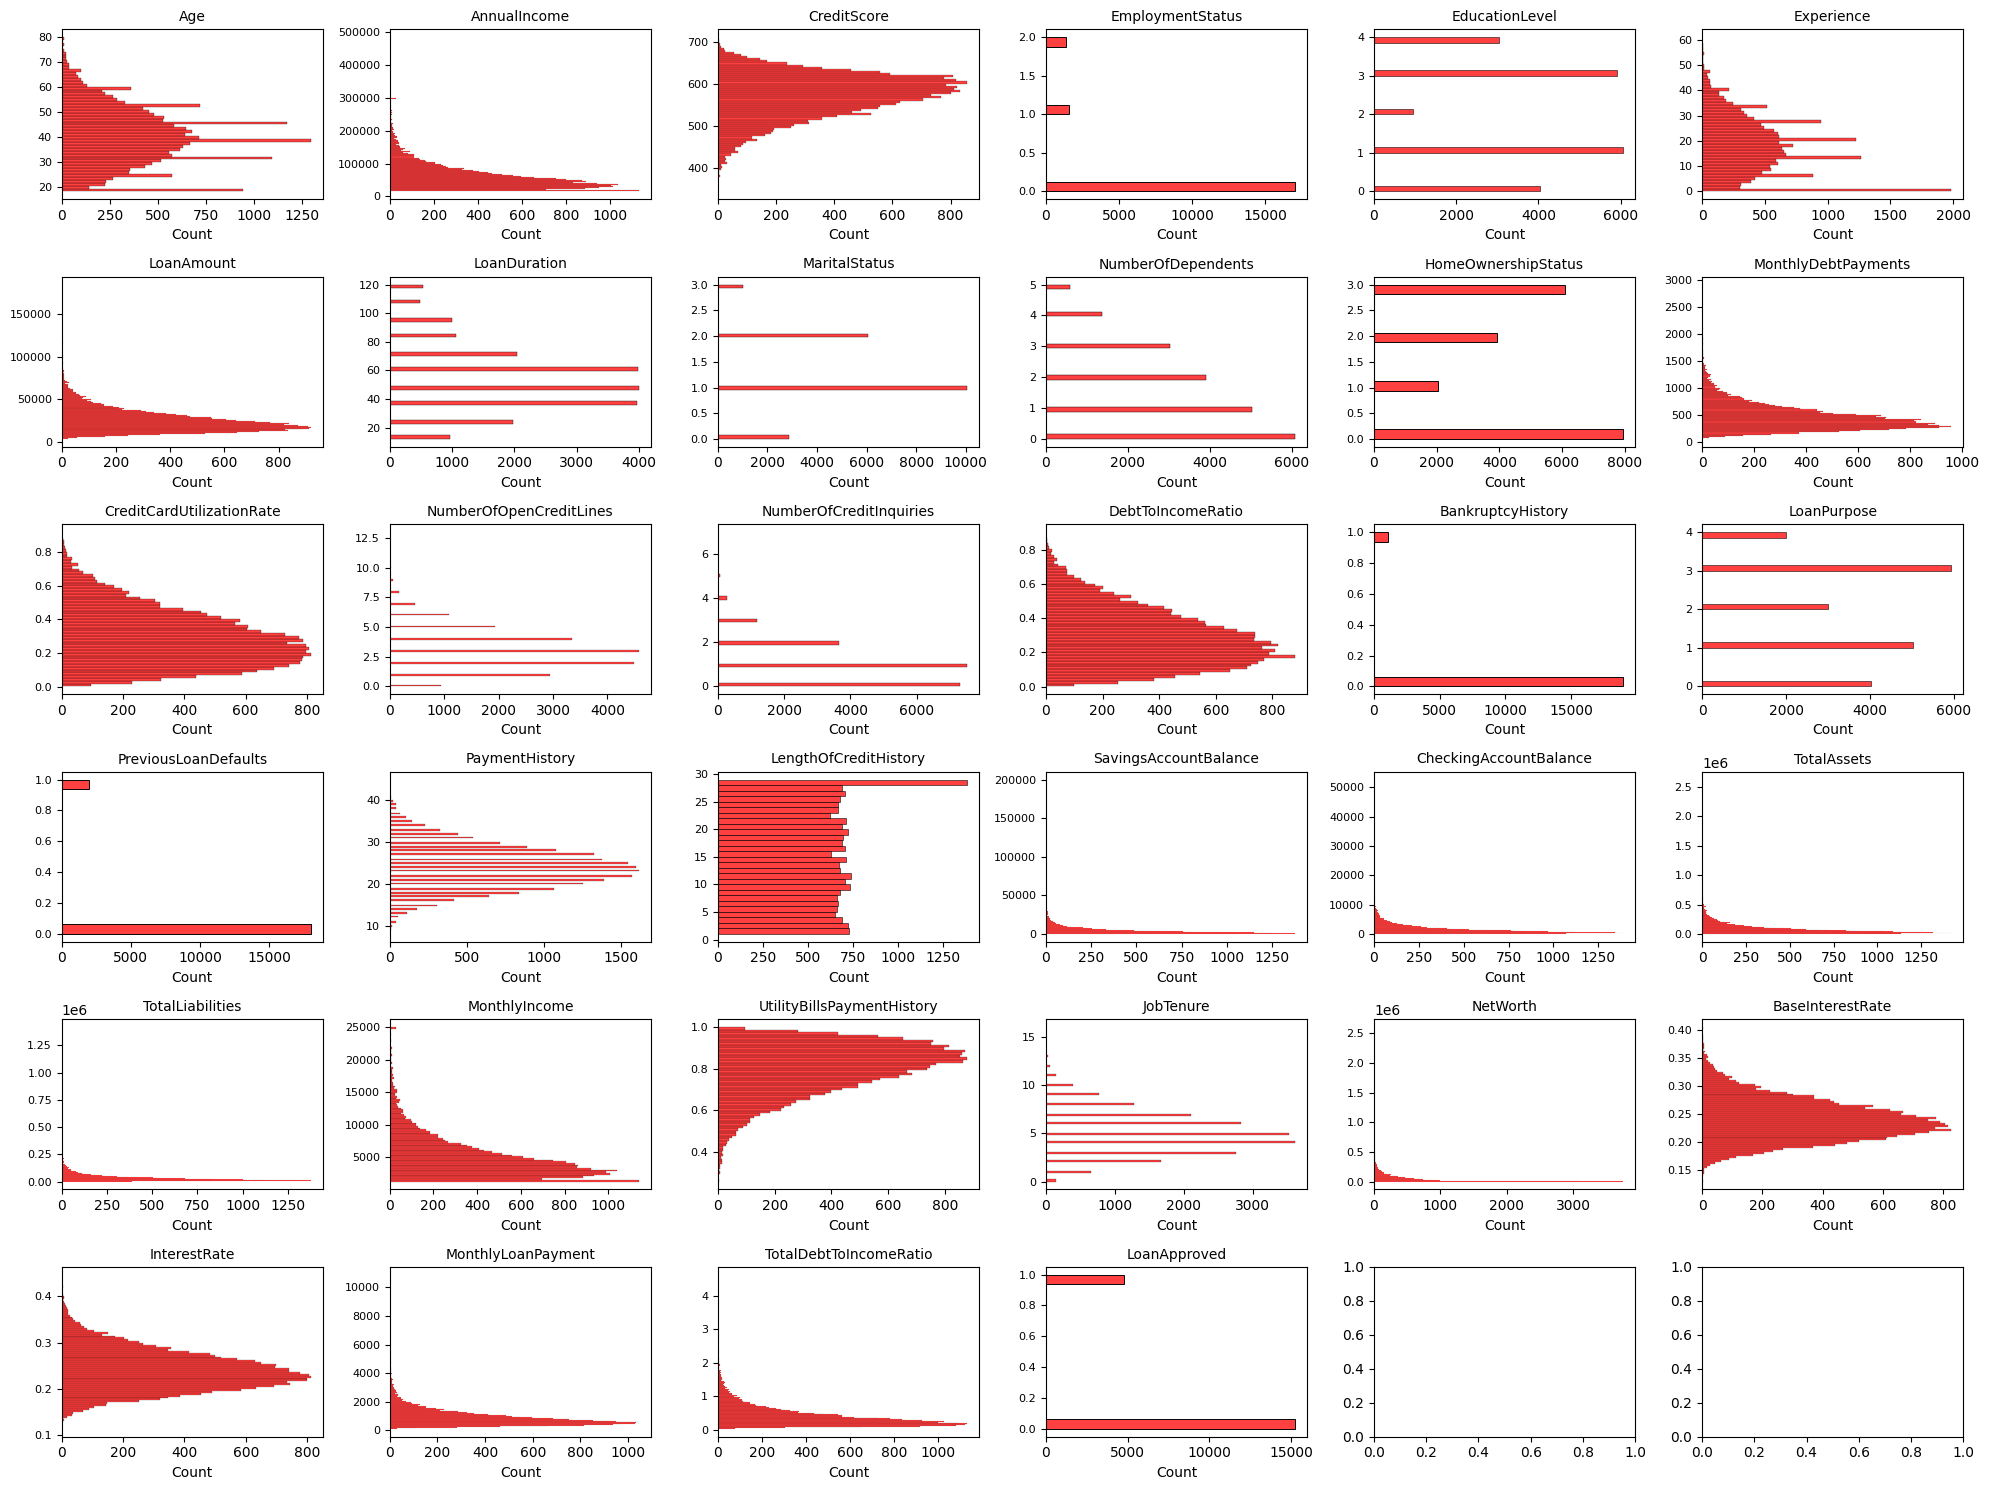

In [274]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(X.columns[:]):
    sns.histplot(data=X, y=column, ax=axes[i], color='red')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)



plt.tight_layout()
plt.show()

#Correlations Identify

In [275]:
corrMatrix = copy.corr()
strongPositveCorr = []
strongPositveCorrWithOneColumn = {}
for i in corrMatrix.columns:
    for j in corrMatrix.columns:
        if i==j:
            continue
        if(corrMatrix.loc[i, j]>=0.8):
            strongPositveCorr.append(j)
        print(f"Correlation between {i} and {j}: {corrMatrix.loc[i, j]:.2f}")
    strongPositveCorrWithOneColumn[i] = strongPositveCorr
    strongPositveCorr = []
        # We can do the same thing for moderate and weak corr
print(strongPositveCorrWithOneColumn)


Correlation between ApplicationDate and Age: 0.01
Correlation between ApplicationDate and AnnualIncome: -0.01
Correlation between ApplicationDate and CreditScore: -0.00
Correlation between ApplicationDate and EmploymentStatus: -0.00
Correlation between ApplicationDate and EducationLevel: 0.01
Correlation between ApplicationDate and Experience: 0.01
Correlation between ApplicationDate and LoanAmount: -0.00
Correlation between ApplicationDate and LoanDuration: 0.00
Correlation between ApplicationDate and MaritalStatus: -0.01
Correlation between ApplicationDate and NumberOfDependents: -0.01
Correlation between ApplicationDate and HomeOwnershipStatus: 0.00
Correlation between ApplicationDate and MonthlyDebtPayments: 0.00
Correlation between ApplicationDate and CreditCardUtilizationRate: 0.02
Correlation between ApplicationDate and NumberOfOpenCreditLines: -0.00
Correlation between ApplicationDate and NumberOfCreditInquiries: -0.01
Correlation between ApplicationDate and DebtToIncomeRatio: 

#Relation Between All features and target

In [276]:
corrMatrix = copy.corr()

strongPositveCorr = []
strongPositveCorrWithOneColumn = {}
for i in corrMatrix.columns:

    if i==Y.name:
        continue
    if(corrMatrix.loc[i, Y.name]>=0.8):
        strongPositveCorr.append(i)
    print(f"Correlation between {i} and {Y.name}: {corrMatrix.loc[i, Y.name]:.2f}")
strongPositveCorrWithOneColumn[i] = strongPositveCorr
strongPositveCorr = []
    # We can do the same thing for moderate and weak corr
print(strongPositveCorrWithOneColumn)

Correlation between ApplicationDate and RiskScore: 0.01
Correlation between Age and RiskScore: -0.16
Correlation between AnnualIncome and RiskScore: -0.48
Correlation between CreditScore and RiskScore: -0.24
Correlation between EmploymentStatus and RiskScore: 0.13
Correlation between EducationLevel and RiskScore: -0.02
Correlation between Experience and RiskScore: -0.17
Correlation between LoanAmount and RiskScore: 0.14
Correlation between LoanDuration and RiskScore: 0.05
Correlation between MaritalStatus and RiskScore: 0.02
Correlation between NumberOfDependents and RiskScore: 0.00
Correlation between HomeOwnershipStatus and RiskScore: 0.00
Correlation between MonthlyDebtPayments and RiskScore: 0.04
Correlation between CreditCardUtilizationRate and RiskScore: 0.11
Correlation between NumberOfOpenCreditLines and RiskScore: 0.01
Correlation between NumberOfCreditInquiries and RiskScore: 0.00
Correlation between DebtToIncomeRatio and RiskScore: 0.33
Correlation between BankruptcyHistory 

#Training

In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    scaledX, scaledY, test_size=0.20, random_state=0)

#To show the best model

In [346]:
models_Errors = {}

#Linear Regression

Fitting

In [347]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

Prediction

In [348]:
yhat = linear_reg.predict(X_test)

Evaluation

In [349]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['Linear Regression'] = Errors
print(f"MSE for Linear Regression: {MSE} ")
print(f"RMSE for Linear Regression: {RMSE}")
print(f"MAE for Linear Regression: {MAE}")
print(f"R2_Score for Linear Regression: {r2Score}")
print(models_Errors)

MSE for Linear Regression: 0.03548191293220222 
RMSE for Linear Regression: 0.1883664326046502
MAE for Linear Regression: 0.14852786499023438
R2_Score for Linear Regression: 0.9421093759477395
{'Linear Regression': {'MSE': 0.03548191293220222, 'RMSE': 0.1883664326046502, 'MAE': 0.14852786499023438, 'r2_Score': 0.9421093759477395}}


#KNN

In [350]:
k_values = list(range(1, 25))
mse_values = []
KNNErrors = {}
for k in k_values:
  #Fitting
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  #predection
  yhat = knn_model.predict(X_test)
  #Evaluation
  metricsPerK = {}

  mse = mean_squared_error(y_test, yhat)
  mse_values.append(mse)
  MSE = mean_squared_error(y_test,yhat)
  RMSE = root_mean_squared_error(y_test,yhat)
  MAE = mean_absolute_error(y_test,yhat)
  r2Score = r2_score(y_test,yhat)
  metricsPerK['MSE'] = MSE
  metricsPerK['RMSE'] = RMSE
  metricsPerK['MAE'] = MAE
  metricsPerK['r2Score'] = r2Score
  KNNErrors[k] = metricsPerK


Best K using linegraph

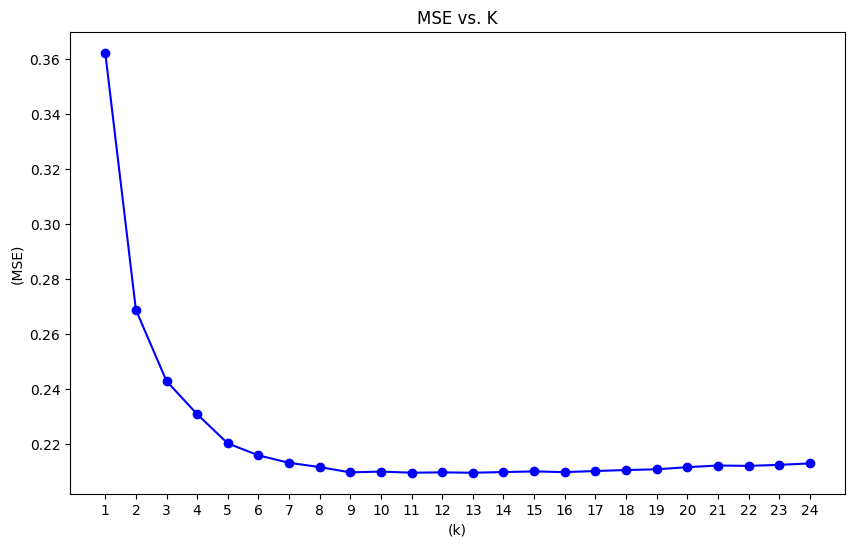

In [351]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.xticks(k_values)
plt.xlabel('(k)')
plt.ylabel('(MSE)')
plt.title('MSE vs. K')
plt.show()


Best K according to MSE Value

In [352]:
winnerK = ""
scores = float("inf")
for k, metrics in KNNErrors.items():
    if metrics["MSE"] < scores:
        winnerK = k
        scores = metrics["MSE"]

print(f"The best k is: {winnerK}")
print(f"Metrics for {winnerK}:")
for metrics,value in KNNErrors[winnerK].items():
    print(f"{metrics}: {value}")
models_Errors['KNN'] = KNNErrors[winnerK]


The best k is: 13
Metrics for 13:
MSE: 0.20945119289940825
RMSE: 0.4576583801258404
MAE: 0.33256
r2Score: 0.6582692627478756


#Ridge


Fitting

In [353]:
RG = Ridge()
RG.fit(X_train,y_train)


Ridge()

Prediction

In [354]:
yhat = RG.predict(X_test)

Evaluation

In [355]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['Ridge'] = Errors
print(f"MSE for Ridge Regression: {MSE} ")
print(f"RMSE for Ridge Regression: {RMSE}")
print(f"MAE for Ridge Regression: {MAE}")
print(f"R2_Score for Ridge Regression: {r2Score}")
print(models_Errors)

MSE for Ridge Regression: 0.035510921943186564 
RMSE for Ridge Regression: 0.18844341841302542
MAE for Ridge Regression: 0.14859506586447707
R2_Score for Ridge Regression: 0.9420620462067463
{'Linear Regression': {'MSE': 0.03548191293220222, 'RMSE': 0.1883664326046502, 'MAE': 0.14852786499023438, 'r2_Score': 0.9421093759477395}, 'KNN': {'MSE': 0.20945119289940825, 'RMSE': 0.4576583801258404, 'MAE': 0.33256, 'r2Score': 0.6582692627478756}, 'Ridge': {'MSE': 0.035510921943186564, 'RMSE': 0.18844341841302542, 'MAE': 0.14859506586447707, 'r2_Score': 0.9420620462067463}}


#Scores for all Models and winner Model

In [356]:
for model,metrics in models_Errors.items():
    print(model)
    for metric,value in metrics.items():
        print(f"{metric}: {value}")

Linear Regression
MSE: 0.03548191293220222
RMSE: 0.1883664326046502
MAE: 0.14852786499023438
r2_Score: 0.9421093759477395
KNN
MSE: 0.20945119289940825
RMSE: 0.4576583801258404
MAE: 0.33256
r2Score: 0.6582692627478756
Ridge
MSE: 0.035510921943186564
RMSE: 0.18844341841302542
MAE: 0.14859506586447707
r2_Score: 0.9420620462067463


The Winner Model Scores

In [357]:
winnerModel = ""
scores = float("inf")
for model, metrics in models_Errors.items():
    if metrics["MSE"] < scores:
        winnerModel = model
        scores = metrics["MSE"]

print(f"The best model is: {winnerModel}")
print(f"Metrics for {winnerModel}:")

for metrics,value in models_Errors[winnerModel].items():
    print(f"{metrics}: {value}")


The best model is: Linear Regression
Metrics for Linear Regression:
MSE: 0.03548191293220222
RMSE: 0.1883664326046502
MAE: 0.14852786499023438
r2_Score: 0.9421093759477395
